**EDA Student Performance Indicator**

1) Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
- Dataset Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 columns and 1000 rows.

3. Dataset Information
- gender : ->(Male/female)
- race/ethnicity : ethnicity of students -> (Group A,B,C,D,E)
- parental level of education : parent's final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test(standard or free/reduced)
- test preparation course : complete or not complete before test
- math score 
- reading score
- writing score

Step 1 : Import all the required libraries

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Step 2 : Read the dataset

In [ ]:
# Loading the dataset
df = pd.read_csv('stud.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

Data Checks to Perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of dataset
- Check various categories present in different categorical column

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.notna().sum()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

Insight or Observation
- There are no missing values.

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
df.duplicated().sum()

np.int64(0)

Insight or Observation
- There are no duplicate values in the dataset.

In [10]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [16]:
df['lunch'].nunique()

2

In [17]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [18]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation:
- From the above description of numerical data, all means are very close to each other - between 66.054 and 69.169.
- All the standard deviation are also close - between 14.6 and 15.19.
- While there is a minimum of 0 for maths, other are having 17 and 10 value.

In [19]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
df.head(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


In [21]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [22]:
df.tail(100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
900,male,group D,master's degree,standard,none,85,84,89
901,female,group C,master's degree,standard,none,73,78,74
902,female,group A,high school,free/reduced,completed,34,48,41
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100
904,female,group D,some high school,free/reduced,none,67,84,84
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [24]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [25]:
df.values

array([['female', 'group B', "bachelor's degree", ..., 72, 72, 74],
       ['female', 'group C', 'some college', ..., 69, 90, 88],
       ['female', 'group B', "master's degree", ..., 90, 95, 93],
       ...,
       ['female', 'group C', 'high school', ..., 59, 71, 65],
       ['female', 'group D', 'some college', ..., 68, 78, 77],
       ['female', 'group D', 'some college', ..., 77, 86, 86]],
      dtype=object)

In [26]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [27]:
[feature for feature in df.columns]

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [33]:
df['gender'].dtype == 'O'

True

In [35]:
df['gender'].dtype !='O'

False

In [36]:
for feature in df.columns:
    if df[feature].dtype == 'O':
        print(feature)

gender
race/ethnicity
parental level of education
lunch
test preparation course


In [37]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [38]:
numerical_feature

['math score', 'reading score', 'writing score']

In [40]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [39]:
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [41]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [43]:
518/(518+482) * 100

51.800000000000004

In [44]:
482/(518+482) * 100

48.199999999999996

Observation
- The dataset is balanced in the gender column.

In [45]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [46]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [47]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [48]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [49]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [50]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

In [51]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

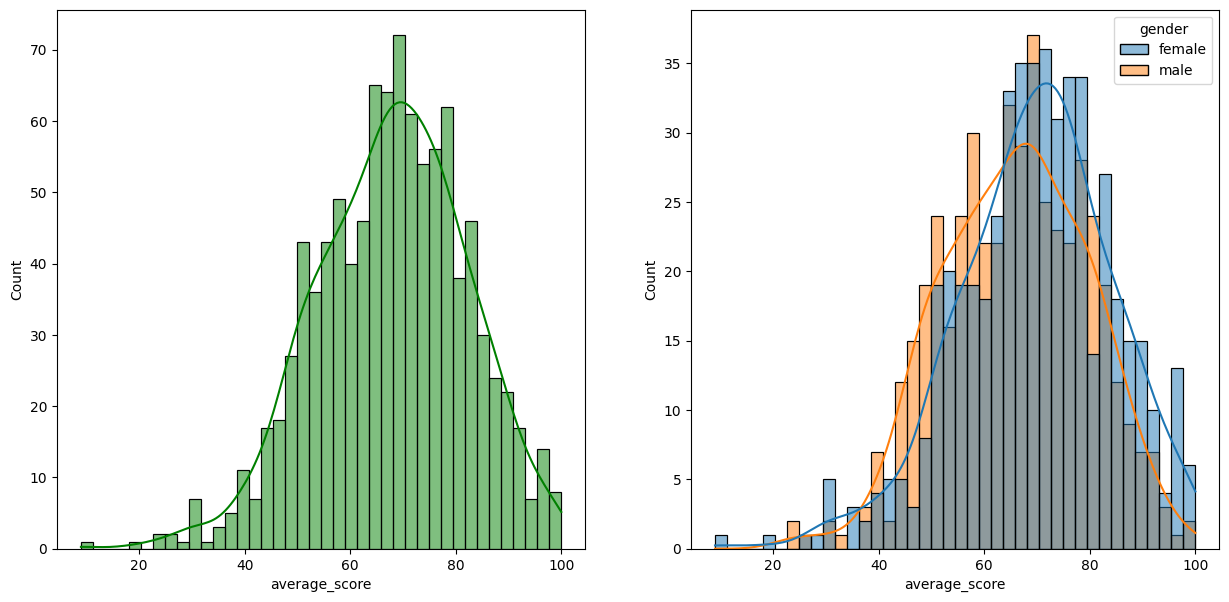

In [55]:
plt.subplots(1, 2, figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x = 'average_score', bins = 40, kde = True, color = 'g')
plt.subplot(1,2,2)
sns.histplot(data=df, x = 'average_score', bins = 40, kde = True, hue = 'gender')
plt.show()

**Insights**
- Female students tends to perform well than male students

In [56]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
total_score                      int64
average_score                  float64
dtype: object

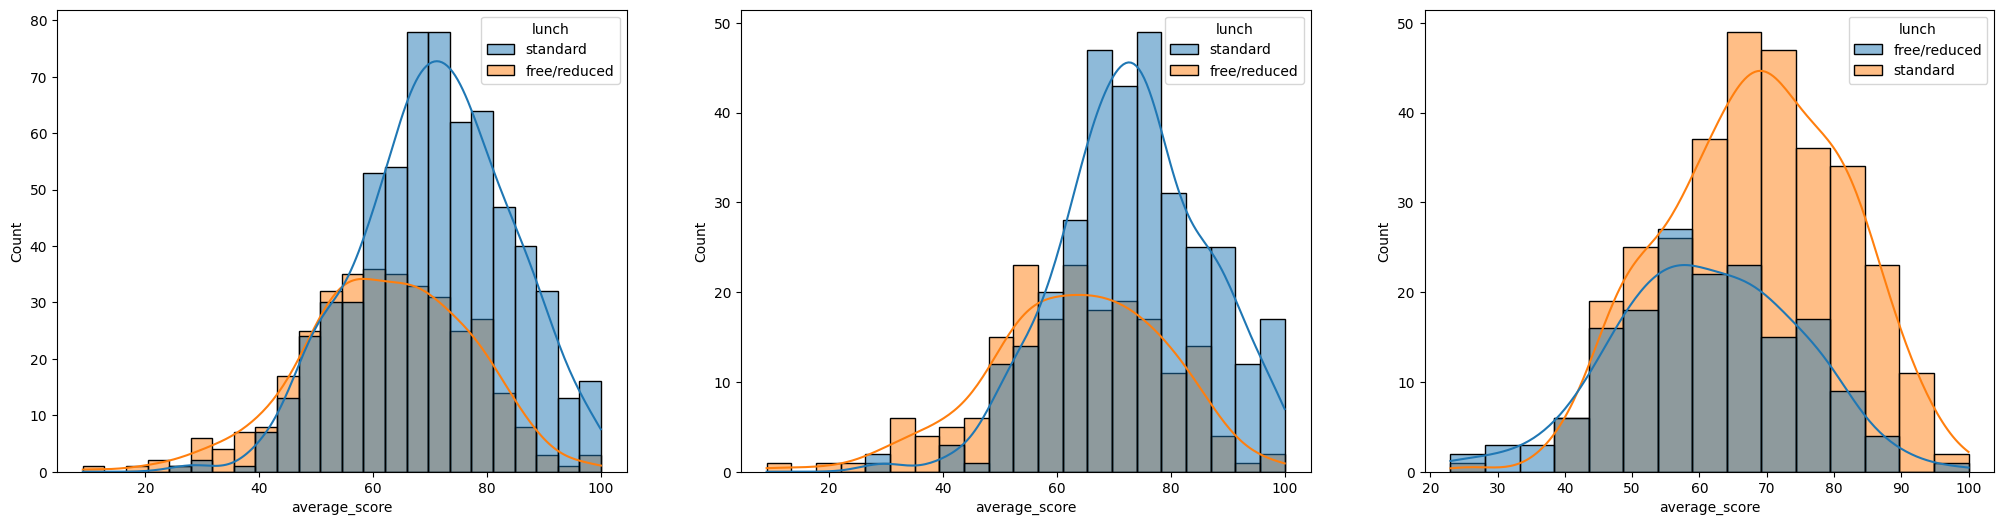

In [59]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'lunch')
plt.show()

**Insights**                                                                    
- Standard Lunch help students perform well in exams.
- Standard lunch helps perform well in exams be it a male or female.

In [60]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


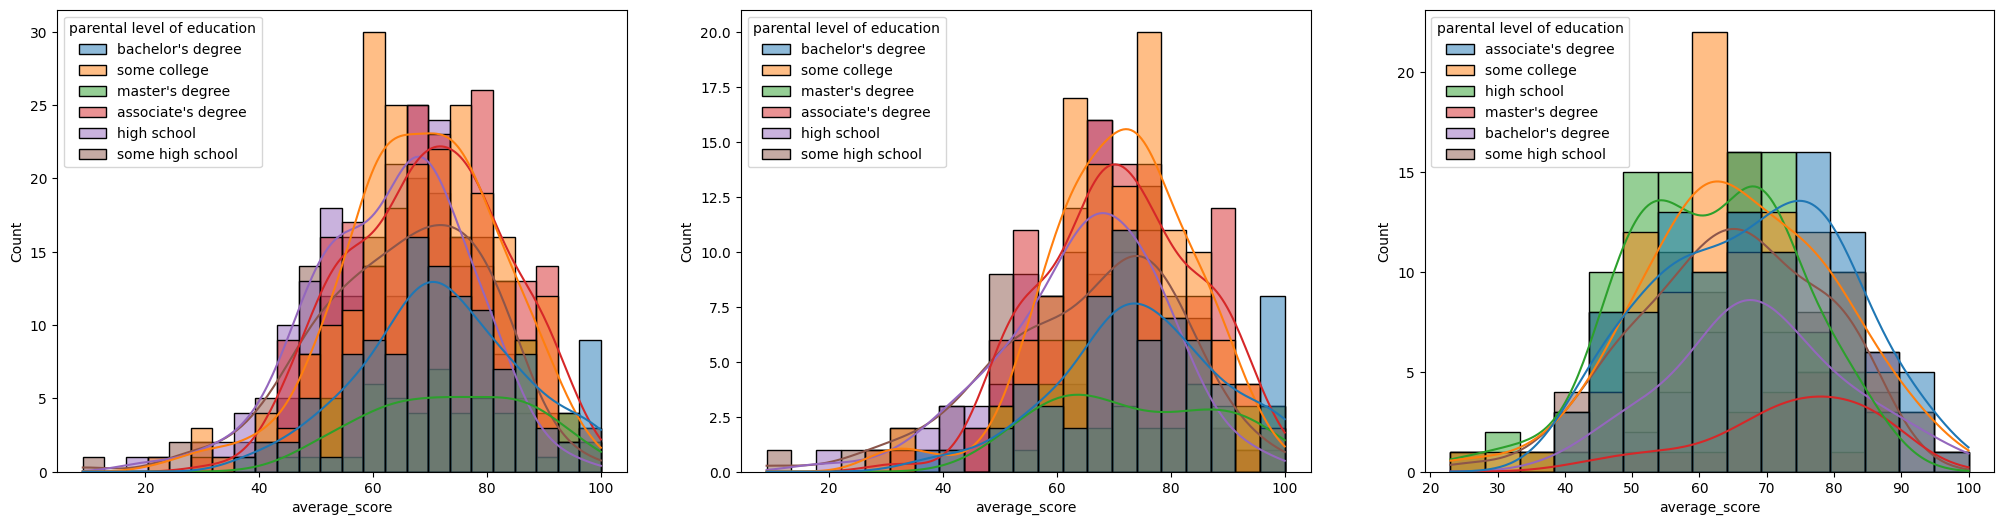

In [61]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'parental level of education')
plt.show()

Observation :
- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parents whose education is of associate degree or master's degree their male child tend to perform well in exam.
- 2nd plot shows that there is no effect of parent's education on female students.

In [ ]:
plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'race/ethnicity')
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'race/ethnicity')
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'race/ethnicity')
plt.show()

Observation :
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

In [ ]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot = True)